기계학습 과제 6

Linear Regression 

정주호

2019312072

In [2]:
import numpy as np
import pandas as pd


In [4]:
house = pd.read_csv("Real estate.csv")

In [5]:
house.head()

No  X1 transaction date  ...  X6 longitude  Y house price of unit area
0   1             2012.917  ...     121.54024                        37.9
1   2             2012.917  ...     121.53951                        42.2
2   3             2013.583  ...     121.54391                        47.3
3   4             2013.500  ...     121.54391                        54.8
4   5             2012.833  ...     121.54245                        43.1

[5 rows x 8 columns]

In [6]:
#각 피쳐별 타입 확인하기
house.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
house.describe()

No  ...  Y house price of unit area
count  414.000000  ...                  414.000000
mean   207.500000  ...                   37.980193
std    119.655756  ...                   13.606488
min      1.000000  ...                    7.600000
25%    104.250000  ...                   27.700000
50%    207.500000  ...                   38.450000
75%    310.750000  ...                   46.600000
max    414.000000  ...                  117.500000

[8 rows x 8 columns]

In [9]:
#Null 값이 있는지 확인하기
house.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f36da4aad50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f36da4b1d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f36da4c1350>],
 'means': [<matplotlib.lines.Line2D at 0x7f36da4b9dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f36da4b9890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f36da4b1310>,
  <matplotlib.lines.Line2D at 0x7f36da4b1850>]}

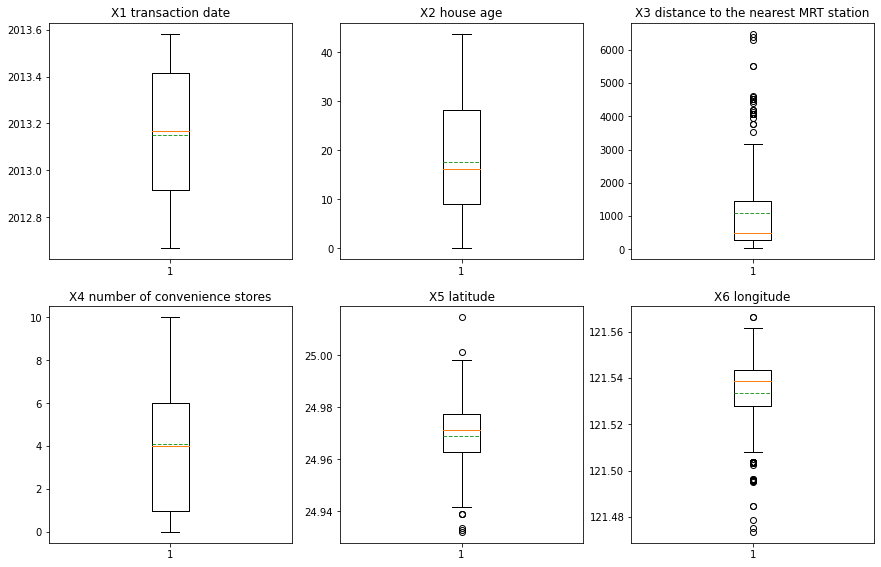

In [10]:
#boxplot으로 이상치 확인해보기 
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(441)
plt.title('X1 transaction date')
plt.boxplot(house['X1 transaction date'],meanline=True, showmeans=True)

plt.subplot(442)
plt.title('X2 house age')
plt.boxplot(house['X2 house age'],meanline=True, showmeans=True)

plt.subplot(443)
plt.title('X3 distance to the nearest MRT station')
plt.boxplot(house['X3 distance to the nearest MRT station'],meanline=True, showmeans=True)

plt.subplot(445)
plt.title('X4 number of convenience stores')
plt.boxplot(house['X4 number of convenience stores'],meanline=True, showmeans=True)

plt.subplot(446)
plt.title('X5 latitude')
plt.boxplot(house['X5 latitude'],meanline=True, showmeans=True)

plt.subplot(447)
plt.title('X6 longitude')
plt.boxplot(house['X6 longitude'],meanline=True, showmeans=True)


In [11]:
#house 데이터 :X3 distance to the nearest MRT station, X4 number of convenience stores , X5 latitude, X6 longitude 순으로 Y house price of unit area 과의 관계가 크다.
corr_matrix_house = house.corr()
print(corr_matrix_house["Y house price of unit area"].sort_values(ascending=False)) #피어슨상관계수

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


#Feature 분석
1. Feature는 총 6개로 이루어져있다. 
2. 데이터의 총 수는 414개이다.
3. Null값은 존재하지 않는 데이터이다.
4. 이상치가 존재하는 Feature : X3 distance to the nearest MRT station, X5 latitude, X6 longitude
5. 상관계수 분석
Y house price of unit area과 상관이 가장 높은 순으로
X3 distance to the nearest MRT station, X4 number of convenience stores , X5 latitude, X6 longitude 이 뽑혔다
-> 집가격과 상관이 높은 것은, 집이 mrt station(전철 역), 편의점이 주의에 몇개 있는지, 위도, 경도 순이었다. 이는 통상적으로 집의 가격과 관련이 있음을 유추할 수 있다.   



Standard deviation: 13.606487697735314 Mean: 37.98019323671498 Median: 38.45 Low: 24.84351230226469 High: 52.05648769773532 



Text(0.5, 1.0, 'price')

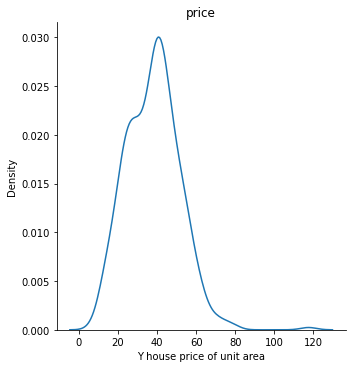

In [12]:
#label(Y house price of unit area)값 분석하기
import seaborn as sns 
import matplotlib.pyplot as plt
median=house['Y house price of unit area'].median()
std=house['Y house price of unit area'].std()
mean=house['Y house price of unit area'].mean()

high=median+std
low=median-std
print("\nStandard deviation:",std,"Mean:",mean,"Median:",median,"Low:",low,"High:",high,"\n")

house['price']='nan'
house.loc[(house['Y house price of unit area']>=high),'price']='High'
house.loc[((house['Y house price of unit area']<high)&(house['Y house price of unit area']>low)),'price']='Med'
house.loc[(house['Y house price of unit area']<=low),'price']='Low'
#print(house.head())
sns.displot(house,x='Y house price of unit area',kind='kde')
plt.title('price')

#Label 분석
1. Standard deviation(표준편차) : 13.606487697735314
2. Mean(평균값) : 37.98019323671498
3. Median(중앙값) : 38.45
4. Low(최소값) : 24.84351230226469
5. High(최대값) : 52.05648769773532

# Linear Regression Modeling

In [20]:
#Linear Regression 모델 구현
house = pd.read_csv("Real estate.csv")

In [21]:
X = house.iloc[:,0:6]
y = house.iloc[:,-1]

In [22]:
X.shape

(414, 6)

In [23]:
y.shape

(414,)

In [24]:
#Train, Test 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

In [25]:
from sklearn.linear_model import  LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

accuracy = lr.score(X_test, y_test)
print("Linear Regression accuracy :",accuracy)
y_pred = lr.predict(X_test)


Linear Regression accuracy : 0.5916473948478711


In [26]:
from sklearn.metrics import explained_variance_score, mean_squared_error,mean_absolute_error, r2_score

print('explained_variance_score: {}'.format(explained_variance_score(y_test, y_pred)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

explained_variance_score: 0.600838283301436
mean_squared_errors: 57.38526463807747
r2_score: 0.5916473948478711


**explained_variance_score: y_pred에 의해 설명되는 분산의 정도**


**mean_squared_errors:** sum((y_true - y_pred)**2) 


**r2_score2: - explained_variance_score와 같습니다.** 

자료출처: https://frhyme.github.io/machine-learning/regression_evaluation_score/

# Cross Validation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv = 5)

print(scores, np.mean(scores), np.std(scores))

[0.61031335 0.57506014 0.43256551 0.48331239 0.7231707 ] 0.5648844185745006 0.1013747210251191


In [49]:
predictions = cross_val_predict(lm, X_test, y_test, cv = 5)

In [50]:
accuracy = r2_score(y_test, predictions)

In [51]:
print(accuracy)

0.5820105029968989


# 정확도가 낮게 나와서 상관관계의해 Feature selection후 다시 진행


In [65]:
X = house[['X4 number of convenience stores','X3 distance to the nearest MRT station','X5 latitude','X6 longitude']]
y = house.iloc[:,-1]

In [66]:
X.shape

(414, 4)

In [68]:
y.shape

(414,)

In [69]:
#Train, Test 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

In [70]:
from sklearn.linear_model import  LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

accuracy = lr.score(X_test, y_test)
print("Linear Regression accuracy :",accuracy)
y_pred = lr.predict(X_test)


Linear Regression accuracy : 0.5835679860214159


# 결과 분석
정확도가 59% 밖에 나오지 않는 이유 분석하기 위해 
Data set Visualizing

이때 상관관계가 높은 피쳐만 분석


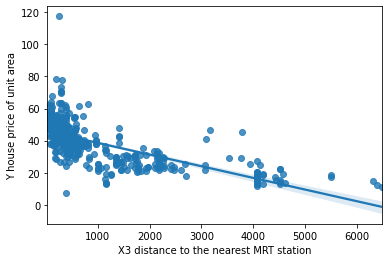

In [59]:
sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=house)

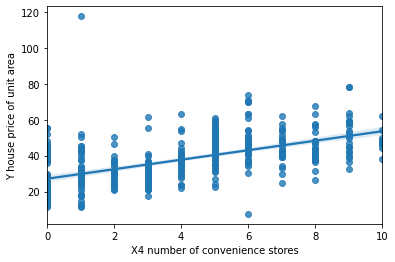

In [60]:
sns.regplot(x="X4 number of convenience stores", y="Y house price of unit area", data=house)

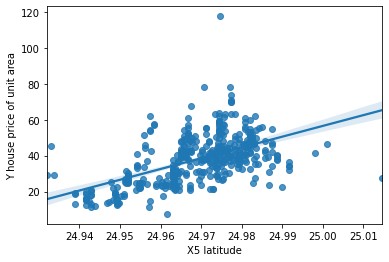

In [61]:
sns.regplot(x="X5 latitude", y="Y house price of unit area", data=house)

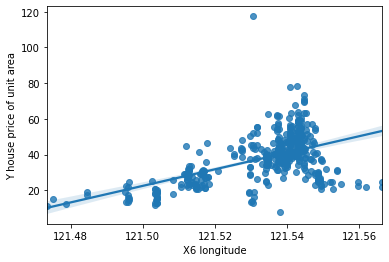

In [62]:
sns.regplot(x="X6 longitude", y="Y house price of unit area", data=house)